# PART- 3 `( Handling With Outliers )`

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

import math

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [149]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum columns
# pd.set_option('display.max_rows', None)

pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [150]:
import re 

def get_diff_category_column(Series:pd.Series, exclude=''',/\n''', pattern=r'''[,\n]| /''', strip='''\n' "!?|.,*+-_/][\\n''', diff_value=list()):  
    diff_value.clear()
    column = Series.dropna().apply(str).str.strip(strip)
    for row in column:
        if not any(x in exclude for x in row) and row not in diff_value:
            diff_value.append(row)
        else:
            for data in map(lambda x: x.strip(strip), filter(None, re.split(pattern, row))):
                if data not in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [151]:
df = pd.read_csv("filled_autoscout.csv")

In [152]:
df.head()

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
0,Sedans,15770.000,VAT deductible,56013.000,66.000,Used,2.000,12.000,Audi,A1,Black,Metallic,Cloth,5.000,5.000,Automatic,1422.000,3.000,1220.000,front,Diesel,99.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,Unknown,3.800,4.300,3.500,3.000
1,Sedans,14500.000,Price negotiable,80000.000,141.000,Used,1.000,12.000,Audi,A1,Red,Metallic,Cloth,3.000,4.000,Automatic,1798.000,4.000,1255.000,front,Benzine,129.000,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,Unknown,5.600,7.100,4.700,2.000
2,Sedans,14640.000,VAT deductible,83450.000,85.000,Used,1.000,12.000,Audi,A1,Black,Metallic,Cloth,4.000,4.000,Automatic,1598.000,3.000,1195.000,front,Diesel,99.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,Unknown,3.800,4.400,3.400,3.000
3,Sedans,14500.000,VAT deductible,73000.000,66.000,Used,1.000,12.000,Audi,A1,Brown,Metallic,Cloth,3.000,4.000,Automatic,1422.000,3.000,1195.000,front,Diesel,99.000,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,Unknown,3.800,4.300,3.500,3.000
4,Sedans,16790.000,VAT deductible,16200.000,66.000,Used,1.000,12.000,Audi,A1,Black,Metallic,Cloth,5.000,5.000,Automatic,1422.000,3.000,1195.000,front,Diesel,109.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",6.000,Germany,4.100,4.600,3.800,3.000


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   body_type               15919 non-null  object 
 1   price_€                 15919 non-null  float64
 2   vat                     15919 non-null  object 
 3   km                      15919 non-null  float64
 4   hp_kW                   15919 non-null  float64
 5   type                    15919 non-null  object 
 6   previous_owners         15919 non-null  float64
 7   warranty                15919 non-null  float64
 8   make                    15919 non-null  object 
 9   model                   15919 non-null  object 
 10  body_color              15919 non-null  object 
 11  paint_type              15919 non-null  object 
 12  upholstery              15919 non-null  object 
 13  nr_of_doors             15919 non-null  float64
 14  nr_of_seats             15919 non-null

In [154]:
def detect_outlier(col):
    print('column name : ',col)
    print("--"*20)
    Q1 = df[col].quantile(0.25)
    print("Q1 : ", Q1)
    Q3 = df[col].quantile(0.75)
    print("Q3 : ", Q3)
    IQR = Q3 - Q1
    print("IQR : ", IQR )
    print("mean : ", round(df[col].mean(), 2))
    print("median : ", df[col].median())
    lower_lim = Q1 - 1.5*IQR
    print("lower limit : ", lower_lim)
    upper_lim = Q3 +1.5*IQR
    print("upper limit : ", upper_lim)
    cnt_of_low = (df[col] < lower_lim).sum()
    print("count of lower values : ", cnt_of_low)
    cnt_of_upper = (df[col] > upper_lim).sum()
    print("count of upper values : ", cnt_of_upper)
    print(" ")
    print("the smallest 10 values :\n", df[col].sort_values().head(10))
    print(" ")
    print("the biggest 10 values :\n", df[col].sort_values(ascending = False).head(10))
    
    print("\n\n")

In [155]:
for i in df.select_dtypes(exclude="O").columns:
    detect_outlier(i)

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
mean :  18019.9
median :  16900.0
lower limit :  -725.0
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594      13.000
8828     120.000
6066     255.000
8829     331.000
8827    4950.000
8825    4990.000
8826    5250.000
8824    5300.000
13770   5445.000
8823    5450.000
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648    74600.000
15826   68320.000
3649    67600.000
3587    64900.000
15828   64332.000
15831   64298.000
3595    63900.000
15833   63477.000
3590    62900.000
3594    58990.000
Name: price_€, dtype: float64



column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
mean :  31964.85
median :  20410.0
lower limit :  -65347.75
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518   0.000
9892   

## price_€

In [156]:
detect_outlier("price_€")

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
mean :  18019.9
median :  16900.0
lower limit :  -725.0
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594      13.000
8828     120.000
6066     255.000
8829     331.000
8827    4950.000
8825    4990.000
8826    5250.000
8824    5300.000
13770   5445.000
8823    5450.000
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648    74600.000
15826   68320.000
3649    67600.000
3587    64900.000
15828   64332.000
15831   64298.000
3595    63900.000
15833   63477.000
3590    62900.000
3594    58990.000
Name: price_€, dtype: float64





In [157]:
# Even if There is no extreme lower value in dataset, There are 4 tiny valuee for price_€ columns such as 13.0, 120.0, 255.0, 331.0


In [158]:
df.loc[df["price_€"] < 332.0,  ["price_€"]] = np.nan

In [159]:
df["price_€"].isnull().sum()

4

In [160]:
df["price_€"] = df.groupby(["make", "model", "body_type", "age"])["price_€"].apply(lambda x : x.fillna(round(x.mean(), 0)))

## km

In [161]:
detect_outlier("km")

column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
mean :  31964.85
median :  20410.0
lower limit :  -65347.75
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518   0.000
9892    0.000
2496    0.000
9882    0.000
15668   0.000
5553    0.000
12512   0.000
5672    0.000
9929    0.000
7828    0.000
Name: km, dtype: float64
 
the biggest 10 values :
 9279    317000.000
3003    291800.000
5712    260000.000
6224    248000.000
15277   240000.000
10804   232000.000
6380    231879.000
6062    230928.000
6399    229500.000
10495   222346.000
Name: km, dtype: float64





In [162]:
df.iloc[df.km.sort_values(ascending=False).head(10).index]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
9279,Sedans,8350.000,VAT deductible,317000.000,66.000,Used,1.000,12.000,Opel,Corsa,Red,Metallic,Cloth,3.000,5.000,Manual,1398.000,4.000,1199.000,front,Benzine,136.000,Euro 6d-TEMP,"Air conditioning,Hill Holder,Power windows",On-board computer,Alloy wheels,"ABS,Central door lock with remote control,Dayt...",5.000,Unknown,5.974,7.400,5.100,2.000
3003,Sedans,14980.000,VAT deductible,291800.000,110.000,Used,1.000,12.000,Audi,A3,Blue,Metallic,Cloth,4.000,5.000,Manual,1968.000,4.000,1350.000,4WD,Diesel,125.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Adaptive headlights,Central door lock,Dayt...",6.000,Germany,4.700,5.600,4.100,3.000
5712,Station wagon,6000.000,VAT deductible,260000.000,100.000,Used,1.000,12.000,Opel,Astra,Silver,Metallic,Cloth,5.000,5.000,Automatic,1598.000,4.000,1425.000,front,Diesel,119.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack,Touch screen,Trailer hi...","ABS,Central door lock,Central door lock with r...",6.000,Germany,4.500,5.700,3.800,3.000
6224,Station wagon,9800.000,VAT deductible,248000.000,81.000,Used,1.000,12.000,Opel,Astra,White,Metallic,Cloth,4.000,4.000,Manual,1686.000,4.000,1523.000,front,Diesel,120.000,Euro 5,"Air conditioning,Armrest,Electrical side mirro...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Touch screen,"ABS,Alarm system,Central door lock,Electronic ...",6.000,Unknown,4.500,5.400,3.948,3.000
15277,Van,14600.000,VAT deductible,240000.000,118.000,Used,1.000,12.000,Renault,Espace,White,Metallic,Part leather,5.000,5.000,Automatic,1598.000,4.000,1659.000,front,Diesel,120.000,Euro 6,"Air conditioning,Automatic climate control,Cru...",Sound system,Alloy wheels,"ABS,Central door lock with remote control,Driv...",6.000,Unknown,4.600,4.926,4.400,2.000
10804,Station wagon,10850.000,VAT deductible,232000.000,125.000,Used,1.000,12.000,Opel,Insignia,White,Metallic,Cloth,4.000,5.000,Automatic,1956.000,4.000,1623.000,front,Diesel,146.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...",On-board computer,Roof rack,"ABS,Central door lock,Daytime running lights,D...",6.000,Unknown,5.500,7.700,4.200,3.000
6380,Station wagon,7990.000,VAT deductible,231879.000,118.000,Used,1.000,12.000,Opel,Astra,Black,Metallic,Cloth,4.000,5.000,Manual,1598.000,4.000,1393.000,front,Diesel,101.000,Euro 6,"Air conditioning,Electrical side mirrors,Multi...","Bluetooth,On-board computer,Radio","Roof rack,Trailer hitch","ABS,Central door lock,Driver-side airbag,Elect...",6.000,Unknown,3.652,3.900,3.500,3.000
6062,Station wagon,8980.000,VAT deductible,230928.000,100.000,Used,1.000,12.000,Opel,Astra,Black,Metallic,Full leather,4.000,5.000,Automatic,1598.000,4.000,1393.000,front,Diesel,101.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Trailer hitch","ABS,Central door lock,Driver-side airbag,Fog l...",6.000,Unknown,4.522,5.700,3.800,3.000
6399,Station wagon,6990.000,VAT deductible,229500.000,100.000,Used,2.000,12.000,Opel,Astra,Black,Metallic,Cloth,5.000,5.000,Manual,1598.000,4.000,1518.000,front,Diesel,104.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Roof rack,Voice Control,Winter tyres","ABS,Central door lock,Central door lock with r...",6.000,Unknown,3.900,4.600,3.600,3.000
10495,Station wagon,9500.000,VAT deductible,222346.000,125.000,Used,1.000,12.000,Opel,Insig

In [163]:
df.groupby("age")["km"].mean()

age
0.000    1328.472
1.000   17922.140
2.000   41525.294
3.000   77442.521
Name: km, dtype: float64

In [164]:
df.groupby("age")["km"].min()

age
0.000    0.000
1.000    1.000
2.000    1.000
3.000   10.000
Name: km, dtype: float64

In [165]:
df.groupby("age")["km"].max()

age
0.000   127022.000
1.000   136000.000
2.000   317000.000
3.000   291800.000
Name: km, dtype: float64

<AxesSubplot:xlabel='km'>

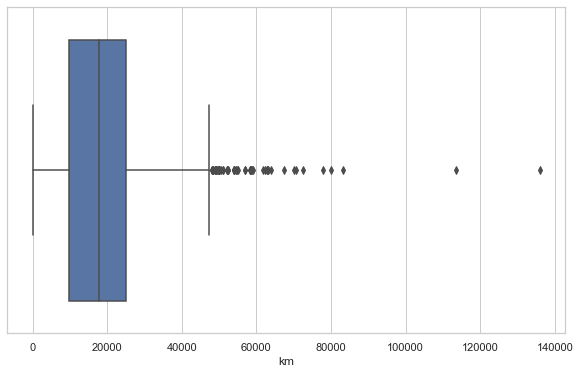

In [166]:
sns.boxplot(x=df[df["age"] == 1]["km"])

In [167]:
df[df["age"] == 1]["km"]

10      11300.000
16       9752.000
19      13406.000
23       9077.000
24       3000.000
           ...   
15789   15000.000
15790      50.000
15791   10803.000
15793       1.000
15795       1.000
Name: km, Length: 4525, dtype: float64

## hp_kW

In [168]:
detect_outlier("hp_kW")

column name :  hp_kW
----------------------------------------
Q1 :  66.0
Q3 :  101.0
IQR :  35.0
mean :  88.37
median :  85.0
lower limit :  13.5
upper limit :  153.5
count of lower values :  22
count of upper values :  406
 
the smallest 10 values :
 6034   1.000
7019   1.000
7014   1.000
9285   1.000
6005   1.000
9287   1.000
9288   1.000
7018   1.000
9289   1.000
9290   1.000
Name: hp_kW, dtype: float64
 
the biggest 10 values :
 3595   294.000
3606   294.000
3587   294.000
3590   294.000
3592   294.000
3593   294.000
3596   294.000
3598   294.000
3599   294.000
3600   294.000
Name: hp_kW, dtype: float64





In [169]:
# the hp_kw values for opel corsa is min=33 max=155

In [173]:
Q1 = df.hp_kW.quantile(0.25)
Q3 = df.hp_kW.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [175]:
df[df.hp_kW > upper_limit].sort_values(by="hp_kW", ascending=True)

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
12437,Sedans,38950.000,VAT deductible,15000.000,154.000,Used,1.000,24.000,Opel,Insignia,White,Metallic,Full leather,5.000,5.000,Automatic,1956.000,4.000,1503.000,4WD,Diesel,181.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Adaptive headlights,Blind spot monitor,Cen...",8.000,Unknown,6.900,9.200,5.500,0.000
12520,Station wagon,36450.000,VAT deductible,10.000,154.000,Pre-registered,1.000,24.000,Opel,Insignia,Black,Metallic,Full leather,4.000,5.000,Automatic,2000.000,4.000,1623.000,4WD,Diesel,187.000,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack,Sport package,Sport sea...","ABS,Adaptive headlights,Blind spot monitor,Cen...",8.000,Unknown,7.100,9.600,5.600,0.000
12519,Station wagon,36490.000,VAT deductible,10.000,154.000,New,0.000,24.000,Opel,Insignia,White,Metallic,Full leather,4.000,5.000,Automatic,2000.000,4.000,1623.000,4WD,Diesel,187.000,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack,Shift paddles,Sport pac...","ABS,Adaptive Cruise Control,Adaptive headlight...",8.000,European Union,7.100,9.600,5.600,0.000
12518,Station wagon,36490.000,VAT deductible,10.000,154.000,New,0.000,24.000,Opel,Insignia,White,Metallic,Full leather,4.000,5.000,Automatic,2000.000,4.000,1623.000,4WD,Diesel,187.000,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack,Shift paddles,Sport pac...","ABS,Adaptive headlights,Blind spot monitor,Cen...",8.000,European Union,7.100,9.600,5.600,0.000
12509,Sedans,36771.000,VAT deductible,16.987,154.000,New,0.000,24.000,Opel,Insignia,Beige,Metallic,Full leather,5.000,5.000,Automatic,1956.000,4.000,1772.000,4WD,Diesel,187.000,Euro 6c,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Shift paddles,Touch screen,Voice ...","ABS,Adaptive headlights,Central door lock,Dayt...",8.000,Germany,7.100,9.400,5.800,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,Sedans,51999.000,VAT deductible,33000.000,294.000,Used,1.000,12.000,Audi,A3,White,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,4WD,Benzine,189.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Shift paddles...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,Italy,8.300,11.300,6.600,2.000
3606,Sedans,49900.000,VAT deductible,17234.000,294.000,Used,1.000,12.000,Audi,A3,Black,Metallic,Part leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,1.000
3610,Sedans,45890.000,VAT deductible,18700.000,294.000,Used,1.000,12.000,Audi,A3,White,Metallic,Part leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Italy,8.300,11.300,6.600,1.000
3601,Sedans,51900.000,VAT deductible,19000.000,294.000,Used,1.000,12.000,Audi,A3,Black,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,

In [176]:
# we detected that upper values can be normal values for hp_kW (>153.5), but it'not impossible value for hp_kW such as 1,9...

In [177]:
df["hp_kW"] = df["hp_kW"].apply(lambda x: np.nan if x < 33 else x)

In [179]:
df.hp_kW.isnull().sum()

22

In [182]:
df.hp_kW = df.groupby(["make", "model","drive_chain","engine_displacement_cc"])["hp_kW"].apply(lambda x : x.fillna(x.median() if x.median() > 1 else df.hp_kW.median()))


In [183]:
df.hp_kW.isnull().sum()

0

## previous_owners

In [184]:
detect_outlier("previous_owners")

column name :  previous_owners
----------------------------------------
Q1 :  1.0
Q3 :  1.0
IQR :  0.0
mean :  0.95
median :  1.0
lower limit :  1.0
upper limit :  1.0
count of lower values :  1659
count of upper values :  797
 
the smallest 10 values :
 2295    0.000
1697    0.000
12697   0.000
12696   0.000
12694   0.000
12693   0.000
12692   0.000
12691   0.000
12690   0.000
12689   0.000
Name: previous_owners, dtype: float64
 
the biggest 10 values :
 15256   4.000
972     4.000
14994   3.000
9478    3.000
10770   3.000
13560   3.000
1290    3.000
11443   3.000
13568   3.000
15007   3.000
Name: previous_owners, dtype: float64





In [ ]:
# There is nothing to do in this column

## warranty

In [189]:
df.warranty.value_counts()

12.000    10078
24.000     4212
36.000      762
60.000      401
48.000      149
6.000       125
72.000       59
3.000        33
18.000       15
23.000       11
20.000        7
25.000        6
2.000         5
50.000        4
26.000        4
16.000        4
4.000         3
1.000         3
19.000        3
34.000        3
13.000        3
28.000        2
22.000        2
14.000        2
11.000        2
46.000        2
21.000        2
9.000         2
17.000        2
45.000        2
33.000        1
40.000        1
65.000        1
10.000        1
15.000        1
7.000         1
8.000         1
56.000        1
49.000        1
47.000        1
30.000        1
Name: warranty, dtype: int64

## nr_of_doors

In [187]:
df.nr_of_doors.value_counts()

5.000    11787
4.000     3079
3.000      832
2.000      219
1.000        1
7.000        1
Name: nr_of_doors, dtype: int64

In [190]:
df[df.nr_of_doors == 1]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
13782,Compact,8500.000,VAT deductible,41493.000,55.000,Used,1.000,12.000,Renault,Clio,White,Metallic,Cloth,1.000,5.000,Manual,1461.000,4.000,1090.000,front,Diesel,85.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive headlights,Central door lock,Dayt...",6.000,Unknown,3.252,3.500,3.100,3.000


In [191]:
df[df.nr_of_doors == 7]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
15202,Van,21600.000,Price negotiable,78000.000,118.000,Used,1.000,12.000,Renault,Espace,Brown,Metallic,Full leather,7.000,5.000,Automatic,1598.000,4.000,1734.000,front,Diesel,120.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,MP3,On-board computer,...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.000,Unknown,4.600,4.926,4.400,3.000


In [195]:
df.loc[(df.nr_of_doors == 1) | (df.nr_of_doors == 7), "nr_of_doors"] = 5

In [196]:
df.loc[(df.nr_of_doors == 1) | (df.nr_of_doors == 7), "nr_of_doors"]

Series([], Name: nr_of_doors, dtype: float64)

## nr_of_seats

In [198]:
df.nr_of_seats.value_counts()

5.000    14308
4.000     1127
7.000      362
2.000      119
6.000        2
3.000        1
Name: nr_of_seats, dtype: int64

In [199]:
df[df["nr_of_seats"] == 7][["make", "model", "body_type"]].value_counts()



make     model   body_type    
Renault  Espace  Van              315
                 Station wagon     19
                 Transporter       16
                 Sedans             4
                 Off-Road           3
                 Other              3
                 Compact            2
dtype: int64

In [ ]:
# There is nothing to do in this column

## engine_displacement_cc

In [212]:
df["engine_displacement_cc"].sort_values(ascending=True).head(60)

14315     1.000
12473     1.000
12484     1.000
14328     1.000
14327     1.000
14326     1.000
13904     1.000
14325     1.000
14324     1.000
14322     1.000
14321     1.000
14320     1.000
14319     1.000
12499     1.000
12501     1.000
12554     1.000
12604     1.000
14314     1.000
12768     1.000
12769     1.000
12781     1.000
12783     1.000
12786     1.000
12790     1.000
12467     1.000
12796     1.000
12800     1.000
12815     1.000
12823     1.000
12835     1.000
12848     1.000
12849     1.000
12798     1.000
12750     1.000
12670     1.000
14284     1.000
10559     2.000
14198     2.000
13912    54.000
10194   122.000
7811    139.000
7810    139.000
7809    139.000
7812    139.000
8128    140.000
15574   160.000
15576   160.000
15577   160.000
15578   160.000
15579   160.000
15575   160.000
13653   890.000
14668   898.000
14667   898.000
14666   898.000
14665   898.000
14620   898.000
14663   898.000
14619   898.000
14661   898.000
Name: engine_displacement_cc, dtype: flo

In [214]:
df.loc[df.engine_displacement_cc < 800][["make", "model"]].value_counts()

make     model   
Opel     Insignia    24
Renault  Clio        15
         Espace       6
Opel     Astra        5
         Corsa        1
dtype: int64

In [202]:
df["engine_displacement_cc"].sort_values(ascending=False)

10932   16000.000
7169    15898.000
10771    2967.000
3609     2480.000
3604     2480.000
           ...   
13904       1.000
12467       1.000
12473       1.000
12484       1.000
14314       1.000
Name: engine_displacement_cc, Length: 15919, dtype: float64

In [207]:
df.loc[(df.engine_displacement_cc > 3000), "engine_displacement_cc"] = df.engine_displacement_cc/10


In [208]:
df.iloc[[10932, 7169]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
10932,Station wagon,14300.000,Price negotiable,76500.000,88.000,Used,1.000,12.000,Opel,Insignia,Grey,Metallic,Full leather,5.000,5.000,Manual,1600.000,4.000,1623.000,front,Diesel,135.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,Unknown,4.500,5.700,3.765,3.000
7169,Station wagon,18490.000,VAT deductible,22327.000,100.000,Employee's car,1.000,12.000,Opel,Astra,Green,Metallic,Cloth,5.000,5.000,Automatic,1589.800,4.000,1393.000,front,Benzine,119.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,Unknown,4.500,5.700,3.800,1.000


## cylinders

In [185]:
df.select_dtypes(exclude="O").columns

Index(['price_€', 'km', 'hp_kW', 'previous_owners', 'warranty', 'nr_of_doors',
       'nr_of_seats', 'engine_displacement_cc', 'cylinders', 'weight_kg',
       'co2e_g', 'gears', 'consumption_comb', 'consumption_city',
       'consumption_country', 'age'],
      dtype='object')

In [ ]:
pd.set_option('display.max_rows', 160)